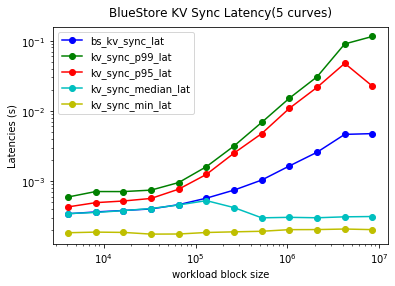

<Figure size 432x288 with 0 Axes>

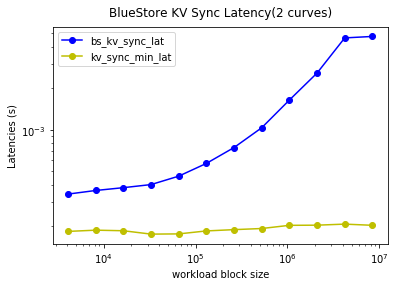

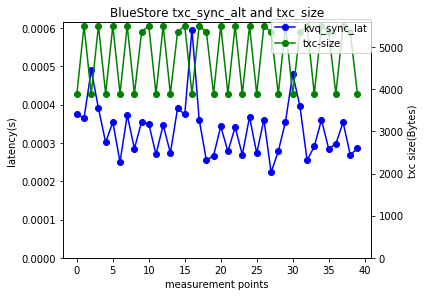

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv

data1 = np.loadtxt('dump-codel-tests.csv', delimiter=',', skiprows=1, unpack=True)
#fig, ax1 = plt.subplots()
plt.figure(1)
plt.plot(data1[0], data1[3], 'bo-', label="bs_kv_sync_lat")
plt.plot(data1[0], data1[5], 'go-', label="kv_sync_p99_lat")
plt.plot(data1[0], data1[6], 'ro-', label="kv_sync_p95_lat")
plt.plot(data1[0], data1[7], 'co-', label="kv_sync_median_lat")
plt.plot(data1[0], data1[8], 'yo-', label="kv_sync_min_lat")

plt.title("BlueStore KV Sync Latency(5 curves)", y=1.02)
#plt.xlim(0)
#plt.ylim(0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('workload block size')
plt.ylabel('Latencies (s)')
plt.legend()
plt.show()
plt.savefig("dump-bs-kv-sync-lat1.png", bbox_inches='tight')

plt.figure(2)
plt.plot(data1[0], data1[3], 'bo-', label="bs_kv_sync_lat")
plt.plot(data1[0], data1[8], 'yo-', label="kv_sync_min_lat")
plt.title("BlueStore KV Sync Latency(2 curves)", y=1.02)
#plt.xlim(0)
#plt.ylim(0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('workload block size')
plt.ylabel('Latencies (s)')
plt.legend()
#plt.show()
plt.savefig("dump-bs-kv-sync-lat2.png", bbox_inches='tight')

series1 = read_csv('dump_kv_sync_lat_vec-4096.csv', header=0, skiprows=10000, nrows=40, parse_dates=True, squeeze=True)
series2 = read_csv('dump_txc_bytes_vec-4096.csv', header=0, skiprows=10000, nrows=40, parse_dates=True, squeeze=True)

fig3 = plt.figure(3)
ax1 = fig3.add_subplot(111)
line1 = series1.plot(style='bo-', label='kvq_sync_lat')
ax1.set_xlabel('measurement points')
ax1.set_ylabel('latency(s)')
ax1.set_ylim(0)

ax2 = ax1.twinx()
line2 = series2.plot(style='go-', label='txc-size')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('txc size(Bytes)')
ax2.set_ylim(0)
fig3.tight_layout()
fig3.legend(loc='upper right', bbox_to_anchor=(0.87, 0.98))
plt.title("BlueStore txc_sync_alt and txc_size", y=1.02)
#plt.show()
fig3.savefig("dump-txc-lat-n-size.png", bbox_inches='tight')


